# Data exploration
This notebook goes through some early data exploration methods

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

# Load in processed data from file
Lesson 01 contains a pipeline from the data source through a slight cleaning process. Then a CSV with the cleaned data will be saved in the data directory. Open that file as a pandas dataframe.

In [2]:
data_file_path = "/home/jovyan/data_science_principals/data/camels/camels_attributes_cleaned_12-06-2024_0302_jf.csv"
#"../data/camels/camels_attributes_cleaned_28-05-2023_0833_jf_DO_NOT_COPY.csv"
if os.path.exists(data_file_path):
    with open(data_file_path, "r") as f:
        df = pd.read_csv(f, index_col="gauge_id")
else:
    print("Data file path does not exist. Create the file with lesson 01, then add the path")

# Stock pandas functions
There are many stock pandas functions we can use to explore the data, we saw a couple of them in lesson 01. Below are some more that could be useful.

### shape of the dataframe
It is always a really, really good idea to know the shape of the data you are dealing with.

In [3]:
df.shape

(671, 38)

### Name the columns and indices

In [4]:
df.columns, df.index

(Index(['p_mean', 'pet_mean', 'p_seasonality', 'frac_snow', 'aridity',
        'high_prec_freq', 'high_prec_dur', 'low_prec_freq', 'low_prec_dur',
        'glim_1st_class_frac', 'glim_2nd_class_frac', 'carbonate_rocks_frac',
        'geol_permeability', 'baseflow_index', 'huc_02', 'soil_depth_pelletier',
        'soil_depth_statsgo', 'soil_porosity', 'soil_conductivity',
        'max_water_content', 'sand_frac', 'silt_frac', 'clay_frac',
        'water_frac', 'organic_frac', 'other_frac', 'gauge_lat', 'gauge_lon',
        'elev_mean', 'slope_mean', 'area_gages2', 'area_geospa_fabric',
        'frac_forest', 'lai_max', 'lai_diff', 'gvf_max', 'gvf_diff',
        'dom_land_cover_frac'],
       dtype='object'),
 Index([ 1013500,  1022500,  1030500,  1031500,  1047000,  1052500,  1054200,
         1055000,  1057000,  1073000,
        ...
        14303200, 14305500, 14306340, 14306500, 14308990, 14309500, 14316700,
        14325000, 14362250, 14400000],
       dtype='int64', name='gauge_id',

### General data statistics

In [5]:
df.describe()

,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,low_prec_freq,low_prec_dur,glim_1st_class_frac,...,elev_mean,slope_mean,area_gages2,area_geospa_fabric,frac_forest,lai_max,lai_diff,gvf_max,gvf_diff,dom_land_cover_frac
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,3.257722,2.787365,-0.041279,0.177604,1.056516,20.930999,1.349837,254.647317,5.953787,0.785546,...,759.421878,46.195307,792.618063,808.077720,0.639539,3.215970,2.448588,0.722104,0.322749,0.809969
std,1.410441,0.554972,0.527430,0.203287,0.615449,4.545221,0.191226,35.115377,3.199436,0.202171,...,785.996956,47.120801,1701.950373,1709.853038,0.372634,1.520134,1.333811,0.168319,0.148565,0.183947
min,0.644565,1.899096,-1.435461,0.000000,0.220284,7.900000,1.075235,169.900000,2.789197,0.296662,...,10.210000,0.822210,4.030000,4.100000,0.000000,0.367125,0.154410,0.184262,0.028998,0.314498
25%,2.373133,2.335206,-0.263524,0.035141,0.695674,18.500000,1.208927,232.700000,4.240878,0.608343,...,249.670000,7.426825,122.280000,127.975000,0.277050,1.814276,1.196827,0.608617,0.188310,0.651085
50%,3.229487,2.688156,0.080925,0.097926,0.855150,22.000000,1.281646,255.850000,4.949627,0.829405,...,462.720000,28.801650,329.680000,340.700000,0.813700,3.371345,2.336477,0.780328,0.315979,0.858219
75%,3.783515,3.146021,0.223987,0.223063,1.267340,24.225000,1.440387,278.925000,6.701866,0.997106,...,928.875000,73.169510,794.295000,804.495000,0.972400,4.696291,3.757439,0.864908,0.462706,0.996715
max,8.936886,4.743906,0.922019,0.906327,5.207913,32.700000,2.090909,348.700000,36.513089,1.000000,...,3571.180000,255.688400,25791.040000,25817.780000,1.000000,5.582121,4.831465,0.915707,0.652197,1.000000


### Correlations between columns

In [6]:
df.corr()

,p_mean,pet_mean,p_seasonality,frac_snow,aridity,high_prec_freq,high_prec_dur,low_prec_freq,low_prec_dur,glim_1st_class_frac,...,elev_mean,slope_mean,area_gages2,area_geospa_fabric,frac_forest,lai_max,lai_diff,gvf_max,gvf_diff,dom_land_cover_frac
p_mean,1.000000,-0.258027,-0.368772,-0.141101,-0.755074,-0.600375,-0.109658,-0.725300,-0.407587,0.125649,...,-0.283284,0.259891,-0.190178,-0.200130,0.582991,0.587788,0.426162,0.628214,-0.017188,0.114561
pet_mean,-0.258027,1.000000,-0.057305,-0.123084,0.504506,0.433814,0.212972,0.526774,0.377470,0.040597,...,0.144067,-0.091772,-0.063953,-0.061589,-0.254220,-0.324471,-0.401677,-0.416375,-0.517107,-0.245225
p_seasonality,-0.368772,-0.057305,1.000000,-0.285437,0.061469,0.311526,-0.582814,0.185307,-0.374173,0.121784,...,-0.279599,-0.661563,0.224417,0.221147,-0.349520,-0.040252,0.142543,-0.000257,0.512966,-0.005317
frac_snow,-0.141101,-0.123084,-0.285437,1.000000,0.104217,-0.309184,0.230007,-0.198457,-0.033585,-0.263582,...,0.840134,0.632296,-0.034968,-0.032905,0.120560,-0.298449,-0.258707,-0.298929,-0.145805,0.031752
aridity,-0.755074,0.504506,0.061469,0.104217,1.000000,0.509342,0.416580,0.741858,0.722440,-0.182004,...,0.407764,0.015978,0.137560,0.154729,-0.582821,-0.704817,-0.645337,-0.815503,-0.395583,-0.148760
high_prec_freq,-0.600375,0.433814,0.311526,-0.309184,0.509342,1.000000,0.165214,0.871780,0.373769,0.069847,...,-0.136847,-0.471117,0.029300,0.035682,-0.552113,-0.362456,-0.306880,-0.399306,-0.073475,-0.111550
high_prec_dur,-0.109658,0.212972,-0.582814,0.230007,0.416580,0.165214,1.000000,0.349553,0.720289,-0.181820,...,0.376884,0.480731,-0.006886,-0.002120,-0.162171,-0.479150,-0.624956,-0.481675,-0.672238,-0.096023
low_prec_freq,-0.725300,0.526774,0.185307,-0.198457,0.741858,0.871780,0.349553,1.000000,0.683594,-0.002457,...,0.048006,-0.294516,0.082635,0.090635,-0.656675,-0.590506,-0.546220,-0.647900,-0.277827,-0.148895
low_prec_dur,-0.407587,0.377470,-0.374173,-0.033585,0.722440,0.373769,0.720289,0.683594,1.000000,-0.143960,...,0.223867,0.223651,0.010900,0.019572,-0.389453,-0.560827,-0.620222,-0.635302,-0.571533,-0.122892
glim_1st_class_frac,0.125649,0.040597,0.121784,-0.263582,-0.182004,0.069847,-0.181820,-0.002457,-0.143960,1.000000,...,-0.323172,-0.265704,-0.110917,-0.116351,0.051278,0.216923,0.212815,0.209703,0.149642,0.130373


# Plot an overview of the data correlations

<Figure size 400x400 with 0 Axes>

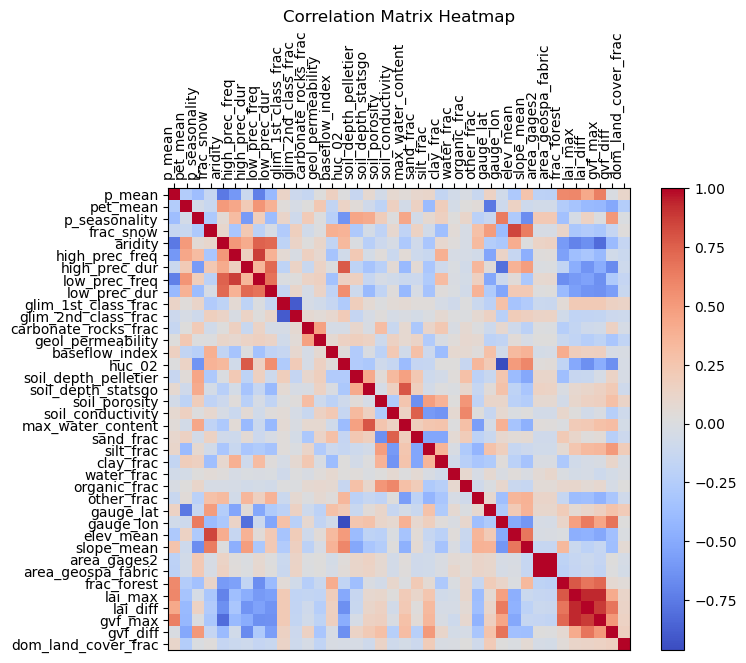

In [7]:
plt.figure(figsize= (4,4), dpi=100)

corr = df.corr()

fig, ax = plt.subplots(figsize=(8, 6))

cax = ax.matshow(corr, cmap='coolwarm')

fig.colorbar(cax)
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

plt.setp(ax.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.title('Correlation Matrix Heatmap')
plt.show()